# Hierachical Clustering for crime data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [4]:
crime_data=pd.read_csv(r'C:\Users\Vanita\OneDrive\Documents\ASSIGNMENTS EXCELR NEW\Clustering assignments\crime_data.csv')

In [5]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
crime_data1=crime_data.drop(['Unnamed: 0'],axis=1)

In [9]:
crime_data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


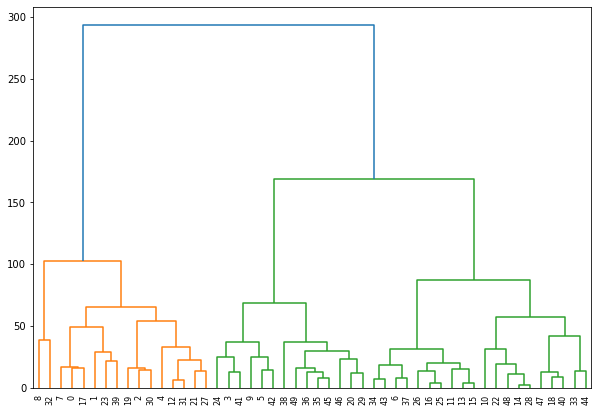

In [10]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime_data1,'complete'))

In [11]:
hclusters=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering()

In [13]:
y=pd.DataFrame(hclusters.fit_predict(crime_data1),columns=['clustersid'])
y['clustersid'].value_counts()

0    34
1    16
Name: clustersid, dtype: int64

In [14]:
crime_data1['clustersid']=hclusters.labels_
crime_data1

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,0


In [15]:
crime_data1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.894118,122.852941,64.235294,17.870588
1,1,11.812500,272.562500,68.312500,28.375000


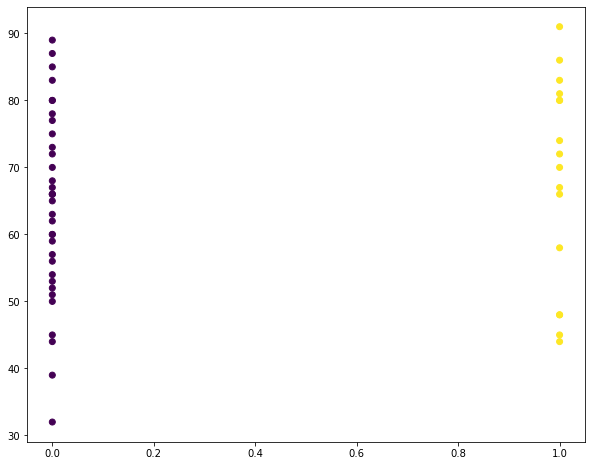

In [16]:
plt.figure(figsize=(10, 8))  
plt.scatter(crime_data1['clustersid'],crime_data1['UrbanPop'], c=hclusters.labels_) 
